### 컨볼루션 층 테스트

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
print(image.shape)
print(image)

W = np.ones((1,1,2,2))
print(W)
b = np.full((1,), 3)
print(b.shape)
print(b)
conv = Convolution(W, b)
out = conv.forward(image)
print(out.shape)
print(out)

### 다차원 배열의 연산

In [ ]:
import numpy as np
a = np.arange(12).reshape(2,2,3)
print(a.shape)
print(a)

In [ ]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(2, 1, 0)
print(b.shape)
print(b)

In [ ]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(1, 0, 2)
print(b.shape) # (2,2,3)
print(b)

In [ ]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(0, 2, 1)
print(b.shape) # (2,3,2)
print(b)

In [ ]:
a = np.arange(12).reshape(2,2,3)
b = a.transpose(2, 0, 1)
print(b.shape) 
print(b)

### im2col 함수 테스트

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col

x1 = np.arange(9).reshape(1, 1, 3, 3)  # OH = (H - FH + 1) , OW = (W - FW + 1) 
col1 = im2col(x1, 2, 2)
print(col1.shape)  # (N*OH*OW, C*FH*FW)
# print(col1)

x2 = np.arange(18).reshape(1, 2, 3, 3)
col2 = im2col(x2, 2, 2)
print(col2.shape)
# print(col2)

x3 = np.arange(36).reshape(2, 2, 3, 3)
col3 = im2col(x3, 2, 2)
print(col3.shape)
# print(col3)

x4 = np.arange(49).reshape(1, 1, 7, 7)
col4 = im2col(x4, 5, 5)
print(col4.shape)   # ( N*OH*OW, C*FH*FW)

x5 = np.arange(10*3*7*7).reshape(10, 3, 7, 7)
col5 = im2col(x5, 5, 5)
print(col5.shape)   # ( N*OH*OW, C*FH*FW)

x6 = np.arange(3*2*7*7).reshape(3, 2, 7, 7)
col5 = im2col(x6, 5, 5)
print(col5.shape)   # ( N*OH*OW, C*FH*FW)

### np.pad() 의 동작

In [ ]:
import numpy as np
pad=0
input_data = np.arange(16).reshape((1,1,4,4))
print(input_data)
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
print(img)

### 파이썬의 슬라이스 문법

In [ ]:
a = np.array([1,2,3])
print(a[0])
print(a[0:1])

In [ ]:
a = np.array([[1,2],[3,4]])
print(a[0])   # [1 2]
print(a[0:1]) # [[1 2]]

In [ ]:
a = np.arange(9).reshape(1,1,3,3)
print(a.shape)  # (1, 1, 3, 3)
a = a[:, :, 0:2:1, 0:2:1]
print(a.shape) #  (1, 1, 2, 2)

In [ ]:
a = np.zeros(36).reshape(1,1,2,2,3,3)
print(a.shape)  # (1, 1, 2, 2, 3, 3)
a = a[:, :, 0, 0, :, :]
print(a.shape)

In [ ]:
image = np.arange(16).reshape(1,1,4,4)
col = np.zeros(36).reshape(1,1,2,2,3,3)

col[:, :, 0, 0, :, :] = image[:, :, 0:3:1, 0:3:1]
print(col) 

### input 채널이 1개인 경우

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(16).reshape(1,1,4,4)
# print(input_data.shape)
# print(input_data)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

print(img.shape)
print(img)
print(col.shape)

# for y in range(filter_h):
#     y_max = y + stride*out_h
#     for x in range(filter_w):
#         x_max = x + stride*out_w
#         col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

# print(col)    # (1,1,2,2,3,3)            

col[:, :, 0, 0, :, :] = img[:, :, 0:3:1, 0:3:1]
col[:, :, 0, 1, :, :] = img[:, :, 0:3:1, 1:4:1]
col[:, :, 1, 0, :, :] = img[:, :, 1:4:1, 0:3:1]
col[:, :, 1, 1, :, :] = img[:, :, 1:4:1, 1:4:1]

print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 1, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
print(col.shape)
print(col)

W = np.ones((1,1,2,2))
print(W)
col_W = W.reshape(1, -1)
print(col_W.shape)
print(col_W)
col_W = col_W.T
print(col_W.shape)
print(col_W)

b = np.full((1,), 3)
out = np.dot(col, col_W) + b  # (9,4)(4,1)
print( out.shape )
print(out)
out = out.reshape(N, out_h, out_w, -1)
print( out.shape )
print(out)
out = out.transpose(0, 3, 1, 2)
print( out.shape )
print(out)

### 합성곱 테스트(채널이 1개인 경우)

In [ ]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
weight = np.ones((1,1,2,2))
b = np.full((1,),3)
print(image)
print(weight)
print(b)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout)
print(cout.shape)

### input 채널이 2개인 경우

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(32).reshape(1,2,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

print(col.shape)  # (1,2,2,2,3,3)
print(col)        
        
ret = col.transpose(0, 4, 5, 1, 2, 3)
print(ret.shape)  # (1, 3, 3, 2, 2, 2)
print(ret)

col = ret.reshape( N*out_h*out_w, -1 )
print(col.shape)
print(col)

W = np.ones((N,C,filter_h,filter_w))
col_W = W.reshape(N, -1).T
print(col_W.shape)
print(col_W )
out = np.dot(col, col_W)  # (9,8)(8,1)
print(out )
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out)

### 합성곱 테스트(채널이 2개인 경우)

In [ ]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(32).reshape(1,2,4,4)
weight = np.ones((1,2,2,2))
b = np.zeros((1,))
print(image)
print(weight)
print(b)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout)
print(cout.shape)

### input 그림이 1개, 채널이 1개, 필터가 2개인 경우

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(16).reshape(1,1,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

FN=2

W = np.array([[[[1,1],
                [1,1]]],
              [[[2,2],
                [2,2]]]])
print(W.shape)
col_W = W.reshape(FN, -1)
print(col_W.shape)
col_W = col_W.T
print(col_W.shape)
b = np.full((1,),3)
out = np.dot(col, col_W) + b # (9,4)(4,2)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out.shape)
print(out)

In [ ]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
weight = np.array([[[[1,1],
                     [1,1]]],
                   [[[2,2],
                     [2,2]]]])
print(weight.shape)
b = np.full((1,),3)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout.shape)  # (1,2,3,3)
print(cout)

### input 그림이 1개, 채널이 2개, 필터가 3개인 경우

In [ ]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(32).reshape(1,2,4,4)
weight = np.array([
                   [[[1,1],[1,1]],[[1,1],[1,1]]],
                   [[[2,2],[2,2]],[[2,2],[2,2]]],
                   [[[3,3],[3,3]],[[3,3],[3,3]]]
                  ])
print(weight.shape)  # (3,2,2,2)
b = np.full((1,), 3)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout.shape)  # (1,3,3,3)
print(cout)

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(32).reshape(1,2,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

FN=3

W =       np.array([
                   [[[1,1],[1,1]],[[1,1],[1,1]]],
                   [[[2,2],[2,2]],[[2,2],[2,2]]],
                   [[[3,3],[3,3]],[[3,3],[3,3]]]
                  ])
print(W.shape)
col_W = W.reshape(FN, -1)
print(col_W.shape)
col_W = col_W.T
print(col_W.shape)
out = np.dot(col, col_W)  # (9,8)(8,3)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out.shape)  # (1,3,3,3)
print(out)

### input 그림이 2개, 채널이 2개, 필터가 3개인 경우

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(64).reshape(2,2,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

FN=3

W =       np.array([
                   [[[1,1],[1,1]],[[1,1],[1,1]]],
                   [[[2,2],[2,2]],[[2,2],[2,2]]],
                   [[[3,3],[3,3]],[[3,3],[3,3]]]
                  ])
print(W.shape)
col_W = W.reshape(FN, -1)
print(col_W.shape)
col_W = col_W.T
print(col_W.shape)
out = np.dot(col, col_W)  # (18,8)(8,3)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out.shape)  # (2,3,3,3)
print(out)

In [ ]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

input_data = np.arange(64).reshape(2,2,4,4)
weight =       np.array([
                   [[[1,1],[1,1]],[[1,1],[1,1]]],
                   [[[2,2],[2,2]],[[2,2],[2,2]]],
                   [[[3,3],[3,3]],[[3,3],[3,3]]]
                  ])
print(weight.shape)
b = np.full((1,),3)
conv = Convolution(weight, b)
cout = conv.forward(input_data)
print(cout.shape)  # (2,3,3,3)
print(cout)

###  합성곱 연산의 정확한 고찰

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

filter_h=2
filter_w=2
out_h=3
out_w=3
input_data = np.arange(16).reshape((1,1,4,4))
print(input_data.shape)
col = np.zeros((1, 1, filter_h, filter_w, out_h, out_w))
# col = np.zeros((1, 1, out_h, out_w, filter_h, filter_w ))
print(col.shape)

# for y in range(out_h):
#     y_max = y + filter_h
#     for x in range(out_w):
#         x_max = x + filter_w
#         col[:, :, y, x, :, :] = input_data[:, :, y:y_max, x:x_max]

for y in range(filter_h):
    y_max = y + out_h
    for x in range(filter_w):
        x_max = x + out_w
        col[:, :, y, x, :, :] = input_data[:, :, y:y_max, x:x_max]


print(col)
ret = col.transpose(0, 4, 5, 1, 2, 3)
print(ret)
ret1 = ret.reshape( 3*3, -1 )


### pad를 사용했을 경우

In [ ]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(1,17).reshape(1,1,4,4)
weight = np.ones((1,1,3,3))
b = np.full((1,),3)
print(image)
print(weight)
print(b)
conv = Convolution(weight, b, pad=1)
cout = conv.forward(image)
print(cout)
print(cout.shape)

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=1
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(9).reshape(1,1,3,3)
print(input_data)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
print(img)

col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
# print(ret.shape)  # (1, 3, 3, 2, 2, 2)
# print(ret)
col = ret.reshape( N*out_h*out_w, -1 )
# print(col.shape)
# print(col)

FN=1

W = np.array([[[[1,1],[1,1]]]])
print(W.shape)

b = np.full((1,), 3)
col_W = W.reshape(FN, -1)
print(col_W.shape)
col_W = col_W.T
print(col_W.shape)
out = np.dot(col, col_W)  # (16,4)(4,1)
print(out)
out = out + b  
print(out)
out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
print(out.shape)  # (1,1,4,4)
print(out)

### 합성곱의 미분 구현

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(16).reshape(1,1,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
col = ret.reshape( N*out_h*out_w, -1 )

W = np.ones((1,1,2,2))
col_W = W.reshape(1, -1)
col_W = col_W.T

b = np.full((1,), 3)
out = np.dot(col, col_W) + b  # (9,4)(4,1)
out = out.reshape(N, out_h, out_w, -1)
out = out.transpose(0, 3, 1, 2)
print( out.shape )
print(out)

In [ ]:
FN = 1
dout = np.arange(9).reshape(1,1,3,3)
# print(dout.shape)
dout = dout.transpose(0,2,3,1)
# print(dout.shape)
dout = dout.reshape(-1, FN)
# print(dout.shape)
# print(dout)
db = np.sum(dout, axis=0)
# print(db)
dW = np.dot(col.T, dout)
dW = dW.transpose(1, 0).reshape(1, 1, 2, 2)
# print(dW)

dcol = np.dot(dout, col_W.T)
# print(dcol)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1
dcol = dcol.reshape(N, out_h, out_w, C, filter_h, filter_w)
# print(dcol)
dcol = dcol.transpose(0, 3, 4, 5, 1, 2)
# print(dcol)

img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))

img[:, :, 0:3:1, 0:3:1] += dcol[:, :, 0, 0, :, :] 
print(img)
img[:, :, 0:3:1, 1:4:1] += dcol[:, :, 0, 1, :, :] 
print(img)
img[:, :, 1:4:1, 0:3:1] += dcol[:, :, 1, 0, :, :] 
print(img)
img[:, :, 1:4:1, 1:4:1] += dcol[:, :, 1, 1, :, :] 
print(img)

In [ ]:
def my_col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col, col2im

input_data = np.arange(16).reshape((1,1,4,4))
print(input_data)
col = im2col(input_data, 2, 2)
print(col.shape)
print(col)
image = my_col2im(col, input_data.shape, 2, 2)
print(image)

In [ ]:
import numpy as np
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(16).reshape(1,1,4,4)
weight = np.ones((1,1,2,2))
b = np.full((1,),3)
print(image)
print(weight)
print(b)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout)
print(cout.shape)
dout = np.arange(9).reshape(1,1,3,3)
dx = conv.backward(dout)
print(dx)
print(dx.shape)

###  Convolution test

### image 채널이 2개인 경우 미분

In [ ]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
sys.path.append(os.pardir)
from common.layers import Convolution

image = np.arange(32).reshape(1,2,4,4)
weight = np.ones((1,2,2,2))
b = np.full((1,),3)
print(image)
print(weight)
print(b)
conv = Convolution(weight, b)
cout = conv.forward(image)
print(cout)
print(cout.shape)
dout = np.arange(9).reshape(1,1,3,3)
dx = conv.backward(dout)
print(dx)
print(dx.shape)

### image 필터가  2개인 경우 미분

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
FN=2
pad=0
stride=1
filter_h = 2
filter_w = 2
input_data = np.arange(16).reshape(1,1,4,4)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

ret = col.transpose(0, 4, 5, 1, 2, 3)
col = ret.reshape( N*out_h*out_w, -1 )

W = np.ones((FN,1,2,2))
col_W = W.reshape(FN, -1)
col_W = col_W.T

b = np.full((1,), 3)
out = np.dot(col, col_W) + b  # (9,4)(4,1)
out = out.reshape(N, out_h, out_w, -1)
out = out.transpose(0, 3, 1, 2)
print( out.shape )
print(out)

In [ ]:
dout = np.arange(18).reshape(1,FN,3,3)
# print(dout.shape)
dout = dout.transpose(0,2,3,1)
# print(dout.shape)
dout = dout.reshape(-1, FN)
# print(dout.shape)
# print(dout)
db = np.sum(dout, axis=0)
# print(db)
dW = np.dot(col.T, dout)
dW = dW.transpose(1, 0).reshape(FN, 1, 2, 2)
print(dW)

dcol = np.dot(dout, col_W.T)
# print(dcol)

N, C, H, W = input_data.shape
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1
dcol = dcol.reshape(N, out_h, out_w, C, filter_h, filter_w)
# print(dcol)
dcol = dcol.transpose(0, 3, 4, 5, 1, 2)
# print(dcol)

img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))

img[:, :, 0:3:1, 0:3:1] += dcol[:, :, 0, 0, :, :] 
print(img)
img[:, :, 0:3:1, 1:4:1] += dcol[:, :, 0, 1, :, :] 
print(img)
img[:, :, 1:4:1, 0:3:1] += dcol[:, :, 1, 0, :, :] 
print(img)
img[:, :, 1:4:1, 1:4:1] += dcol[:, :, 1, 1, :, :] 
print(img)

### 풀링 소스 분석

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.util import im2col
from common.util import col2im
from common.layers import Convolution

class MyPooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        print('col', col)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        print('col', col)

        arg_max = np.argmax(col, axis=1)
        print('arg_max', arg_max)
        out = np.max(col, axis=1)
        print('out', out)
        out = out.reshape(N, out_h, out_w, C)
        print('out', out)
        out = out.transpose(0, 3, 1, 2)
        print('out', out)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        print('dmax', dmax)
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        print('dcol', dcol)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

### 채널이 1개인 경우 맥스 풀링 테스트

In [ ]:
x = np.array([[[[ 7, 11, 13, 15],
                [ 3,  4,  2,  3],
                [ 1,  2, 17,  9],
                [ 1,  8,  3, 10]]]])
print(x)

In [ ]:
pool = MyPooling(2,2,2)
pout = pool.forward(x)
print(pout)

### 채널이 2개인 경우 맥스 풀링 테스트

In [ ]:
x = np.array([[[[ 7, 11, 13, 15],
                [ 3,  4,  2,  3],
                [ 1,  2, 17,  9],
                [ 1,  8,  3, 10]],
               [[ 5,  8,  6,  7],
                [ 10, 4, 11, 13],
                [ 9,  3, 10,  4],
                [ 1,  2,  5, 16]],
              ]])
print(x.shape)
pool = MyPooling(2,2,2)
pout = pool.forward(x)
print(pout)

### 맥스 풀링 미분 구현

In [ ]:
import numpy as np
dout = np.array([[[[1,2],
                   [3,4]],
                  [[5,6],
                   [7,8]]]])
print(dout.shape)
dout = dout.transpose(0, 2, 3, 1)
print(dout)
print(len(dout))
print(dout.size)

In [ ]:
pool_h=2
pool_w=2
pool_size = pool_h * pool_w
dmax = np.zeros((dout.size, pool_size))
print(dmax)

In [ ]:
arg_max = np.array([1,2,1,3,3,0,0,3])
print(dout.flatten())
print(np.arange(8))
print(arg_max.flatten())

In [ ]:
dmax[np.arange(arg_max.size), arg_max.flatten()] = dout.flatten()
# dmax[[0,1,2,3,4,5,6,7], [1,2,1,3,3,0,0,3]] = [0,4,1,5,2,6,3,7]
print(dmax)

In [ ]:
a = [1,2,3]+[4,5]
print(a)
b = "hello"+"world"
print(b)
c = (1,2,2,1)+(4,)
print(c)

In [ ]:
dmax = dmax.reshape(dout.shape + (pool_size,))  # (1,2,2,1) + (4) => (1, 2, 2, 1, 4)
print(dmax.shape)
print(dmax)

In [ ]:
dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)  # (1,2,2,2,4)
print(dcol.shape)
print(dcol)

In [ ]:
dx = my_col2im(dcol, (1,1,4,4), 2,2,2,0)
print(dx)

In [ ]:
dout = np.array([[[[1,2],
                   [3,4]]]])
dx = pool.backward(dout)
print(dx)

### 채널이 2개인 경우 맥스 풀링 테스트

In [ ]:
x = np.array([[[[ 7, 11, 13, 15],
                [ 3,  4,  2,  3],
                [ 1,  2, 17,  9],
                [ 1,  8,  3, 10]],
               [[ 5,  8,  6,  7],
                [10,  4, 11, 13],
                [ 9,  3, 10,  4],
                [ 1,  2,  5, 16]]
              ]])
print(x.shape)

In [ ]:
pool = MyPooling(2,2,2)
out = pool.forward(x)
print(out.shape)

In [ ]:
dout = np.array([[[[1,2],
                   [3,4]],
                  [[5,6],
                   [7,8]]]])
print(dout.shape)
dx = pool.backward(dout)
print(dx.shape)
print(dx)

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from matplotlib.image import imread
from common.layers import Convolution

def filter_show(filters, nx=4, show_num=16):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(show_num / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(show_num):
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')


network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# 학습된 가중치
network.load_params("params.pkl")

filter_show(network.params['W1'], 16)

img = imread('../dataset/cactus_gray.png')
# print(img.shape)
img = img.reshape(1, 1, *img.shape)
# print(img.shape)
fig = plt.figure()

# w_idx = 1

# w = network.params['W1']
# b = network.params['b1']
# print(w.shape)
# print(b.shape)
# conv_layer = Convolution(w, b) 
# out = conv_layer.forward(img)
# print(out.shape)  # (1,30,329,246)

# print(network.params['W1'].shape)
for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]

    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b) 
    out = conv_layer.forward(img)
#     print(out.shape)
    out = out.reshape(out.shape[2], out.shape[3])
    
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

In [ ]:
import numpy as np
from simple_convnet import SimpleConvNet

network = SimpleConvNet(input_dim=(1,10, 10), 
                        conv_param = {'filter_num':10, 'filter_size':3, 'pad':0, 'stride':1},
                        hidden_size=10, output_size=10, weight_init_std=0.01)

X = np.random.rand(100).reshape((1, 1, 10, 10))
T = np.array([1]).reshape((1,1))

grad_num = network.numerical_gradient(X, T)
grad = network.gradient(X, T)

for key, val in grad_num.items():
    print(key, np.abs(grad_num[key] - grad[key]).mean())

In [40]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        print(self.params['W2'].shape)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()                                                  # (100,1,28,28)
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])  # (100,30,24,24)
        self.layers['Relu1'] = Relu()                                                # (100,30,24,24)
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)                 # (100,30,12,12)    
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])        # (100,4320)(4320,100)
        self.layers['Relu2'] = Relu()                                                # (100,100)
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])        # (100,100)(100,10)

        self.last_layer = SoftmaxWithLoss()                                          # (100,10)

    def predict(self, x):
        for layer in self.layers.values():
#             print(x.shape)
            x = layer.forward(x)

#         print(x.shape)
        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

(4320, 100)
train loss:2.2989340417785127
=== epoch:1, train acc:0.132, test acc:0.123 ===
train loss:2.2964891367342615
train loss:2.2927044889058767
train loss:2.2892615481466523
train loss:2.2769012442819503
train loss:2.2747264015938056
train loss:2.24553445407179
train loss:2.2403654206425814
train loss:2.221265588470099
train loss:2.2070089283038867
train loss:2.1690259928265148
train loss:2.1155424826093046
train loss:2.0914410007713724
train loss:2.052212171155078
train loss:1.970225603166154
train loss:1.9260155269490633
train loss:1.7757111038802398
train loss:1.7773112603862162
train loss:1.624612415489894
train loss:1.6027247167370344
train loss:1.5948388900682853
train loss:1.43406919465969
train loss:1.3403106667824403
train loss:1.4077817206179861
train loss:1.375172016302764
train loss:1.1077763501615947
train loss:1.0757165610286414
train loss:1.1381505336527018
train loss:0.9220860712128566
train loss:0.8931791889208733
train loss:0.9058758756278901
train loss:0.86647

train loss:0.21355514814763102
train loss:0.3307266806060604
train loss:0.2938324262176735
train loss:0.17042878044449408
train loss:0.10897113138908188
train loss:0.2086754803591505
train loss:0.20080440880423908
train loss:0.12834348730993814
train loss:0.18544528890103582
train loss:0.1345072857319182
train loss:0.08472185262368313
train loss:0.17062610196453964
train loss:0.13440381289062578
train loss:0.39377852789258855
train loss:0.22210633613979744
train loss:0.17251587690863587
train loss:0.21950447444052226
train loss:0.20366711979513663
train loss:0.17765372579254254
train loss:0.31454304002974526
train loss:0.1516410772136992
train loss:0.3271552145070222
train loss:0.13757674019695407
train loss:0.17614608631391332
train loss:0.11517229095684327
train loss:0.1788558216646258
train loss:0.3452581726191234
train loss:0.3599910079250577
train loss:0.19964298588924403
train loss:0.35562510862427016
train loss:0.22948782040465646
train loss:0.19735873483356264
train loss:0.1079

train loss:0.03576280493193055
train loss:0.06140122814635188
train loss:0.09518790551124429
train loss:0.0455752899841351
train loss:0.08847690629834441
train loss:0.09019834629630066
train loss:0.09878859073424671
train loss:0.04954740247521153
train loss:0.12428309762507997
train loss:0.0626156787526459
train loss:0.13424526523452568
train loss:0.04026483330905614
train loss:0.061119365284935494
train loss:0.03881055512187258
train loss:0.027783419673796942
train loss:0.07660528388855391
train loss:0.04147333070766569
train loss:0.03872532791976928
train loss:0.043952601884516274
train loss:0.05153344401024593
train loss:0.038708278951500905
train loss:0.06505921598358314
train loss:0.07495197230727005
train loss:0.06760105732315749
train loss:0.06558511893393941
train loss:0.03198242142299737
train loss:0.06810326522955004
train loss:0.05777144678763622
train loss:0.054735052742272666
train loss:0.08770001380675742
train loss:0.08547215249844385
train loss:0.0493485689487298
=== ep

train loss:0.04827708258340697
train loss:0.0408587799524659
train loss:0.028897280875387895
train loss:0.013884001857858668
train loss:0.0434846324998496
train loss:0.022534470232244044
train loss:0.021241701891579482
train loss:0.042477083650822506
train loss:0.01004703492071174
train loss:0.044610805237126766
train loss:0.021829761728657904
train loss:0.014015924066673948
train loss:0.06045256160008358
train loss:0.03837976688738808
train loss:0.05243695440303667
train loss:0.03390296273993729
train loss:0.01865715062646431
train loss:0.02313068450508931
train loss:0.02267588509328885
train loss:0.02996127025364527
train loss:0.03438433516861438
train loss:0.01767653820116415
train loss:0.015588694031898805
train loss:0.04790692276994605
train loss:0.0871358946594093
train loss:0.03602876287349546
=== epoch:17, train acc:0.99, test acc:0.96 ===
train loss:0.017141852008956536
train loss:0.0636434164290875
train loss:0.023486580969226865
train loss:0.030243311948677954
train loss:0.0

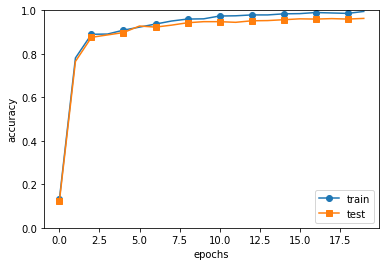

In [41]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)


# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

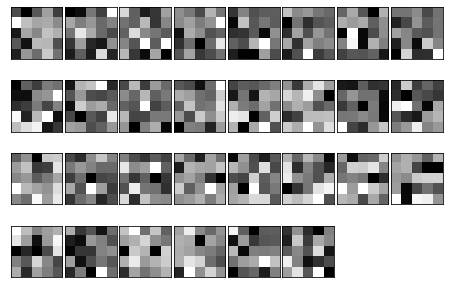

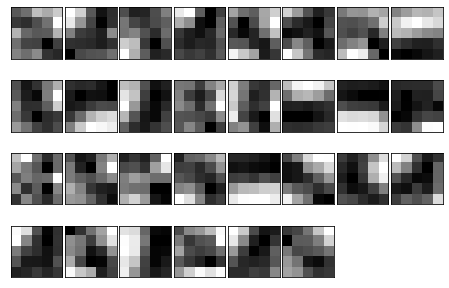

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])